# Klasyfikacja Grzybów
W ramach *Projektu 1* wybrano temat klasyfikacji grzybów na trujące / jadalne na podstawie bazy danych **National Audubon Society Field Guides**, które zostały udostępnione na stronie https://archive.ics.uci.edu/dataset/73/mushroom

## Dodatkowe informacje
Ten zestaw danych obejmuje opisy hipotetycznych próbek odpowiadających 23 gatunkom grzybów z rodziny Agaricus i Lepiota. Każdy gatunek jest oznaczony jako zdecydowanie jadalny, zdecydowanie trujący lub o nieznanej jadalności i niezalecany do spożycia. Ta ostatnia kategoria została połączona z trującą. Przewodnik jednoznacznie stwierdza, że nie ma prostych zasad określających jadalność grzyba; nie ma reguły takiej jak "trzy listki, trzymaj się z daleka" dla trującego dębu i bluszczu.

## Trudność problemu
*Czy baza danych jest skomplikowana i ma błędy lub braki danych?*

Baza danych składa się z ponad 8000 rekordów i 22 atrybutów, w których znajdziemy atrybuty typu kategorycznego oraz binarnego. Ponadto baza danych zawiera braki w danych.

*Czy jest ona dość słabo przebadana czy już wydaje się „oklepana”?*

Baza danych pochodzi z 1987 roku, jednak pod względem wyświetleń na stronie, z której pobierałem dane, nie znajduje się w pierwszej dziesiątce (biorąc pod uwagę tylko bazy danych, które spełniały wcześniejsze wymogi).

## Dane
Przejdźmy do wczytania danych. Następnie spójrzmy na pierwych kilka rekordów i podstawowe statystyki:

In [41]:
import pandas as pd

df = pd.read_csv("mushroom/agaricus-lepiota-data.csv")

In [43]:
print(df.describe())

       poisonous cap-shape cap-surface cap-color bruises  odor  \
count       8124      8124        8124      8124    8124  8124   
unique         2         6           4        10       2     9   
top            e         x           y         n       f     n   
freq        4208      3656        3244      2284    4748  3528   

       gill-attachment gill-spacing gill-size gill-color stalk-shape  \
count             8124         8124      8124       8124        8124   
unique               2            2         2         12           2   
top                  f            c         b          b           t   
freq              7914         6812      5612       1728        4608   

       stalk-root stalk-surface-above-ring stalk-surface-below-ring  \
count        8124                     8124                     8124   
unique          5                        4                        4   
top             b                        s                        s   
freq         3776       

## Przygotowanie do eksperymentów 1
Brakujące wartości w bazie danych grzybów są oznaczone jako '?'. Tylko jeden atrybut (stalk-root) zawiera braki w danych. Przygotujmy listę brakujących wartości. Następnie wczytajmy ponownie bazę danych z dodatkowym parametrem, tak aby Pandas je rozpoznawał.

In [44]:
print(df.head())

  poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1             

Możemy sprawdzić rozkład brakujących wartości w każdej z kolumn:

In [45]:
missing_values = ['?']
df = pd.read_csv("mushroom/agaricus-lepiota-data.csv", na_values=missing_values)

In [46]:
print(df.isnull().mean())

poisonous                   0.000000
cap-shape                   0.000000
cap-surface                 0.000000
cap-color                   0.000000
bruises                     0.000000
odor                        0.000000
gill-attachment             0.000000
gill-spacing                0.000000
gill-size                   0.000000
gill-color                  0.000000
stalk-shape                 0.000000
stalk-root                  0.305268
stalk-surface-above-ring    0.000000
stalk-surface-below-ring    0.000000
stalk-color-above-ring      0.000000
stalk-color-below-ring      0.000000
veil-type                   0.000000
veil-color                  0.000000
ring-number                 0.000000
ring-type                   0.000000
spore-print-color           0.000000
population                  0.000000
habitat                     0.000000
dtype: float64


Jak widać brakuje około 30% wartości w kolumnie "stalk-root". Sprawdźmy dokładną ilość tych braków:

In [47]:
print(df.isnull().sum())

poisonous                      0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


Ze względu na dużą ilość brakujących rekordów w kolumnie "stalk-root", ten atrybut został usunięty. Reszta atrybutów oraz target zostały przekształcone na wartości "dummies". W ten sposób zwiększymy efektywność programowania.

In [48]:
df = df.drop(str(df.columns[11]), axis=1)
df2 = pd.get_dummies(df)
print(df2)

print("\nLiczba rekordów: ", df2.shape[0])
print("\nLiczba atrybutów: ", df2.shape[1])

print("Pozostałe brakujące wartości wśród artybutów: ", df2.isnull().sum().sum())

      poisonous_e  poisonous_p  cap-shape_b  cap-shape_c  cap-shape_f  \
0           False         True        False        False        False   
1            True        False        False        False        False   
2            True        False         True        False        False   
3           False         True        False        False        False   
4            True        False        False        False        False   
...           ...          ...          ...          ...          ...   
8119         True        False        False        False        False   
8120         True        False        False        False        False   
8121         True        False        False        False         True   
8122        False         True        False        False        False   
8123         True        False        False        False        False   

      cap-shape_k  cap-shape_s  cap-shape_x  cap-surface_f  cap-surface_g  \
0           False        False         True   

Następnie dzielimy dane na zbiory treningowe i testowe i zmniejszamy wymiar atrybutów z 114 do 2 głównych komponentów. Skalowanie atrybutów nie będzie potrzebne, ponieważ wszystkie atrybuty mają wartość 0 lub 1.

PCA dokonano na zbiorze treningowym, żeby uniknąć ryzyka wycieku danych ze zbioru treningowego do testowego.

In [61]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Zdefiniuj trujące jako 1 i jadalne jako 0 dla targetu
X = df2.iloc[:,2:]
y = df2.iloc[:,1]

# Podziel dane na zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Zredukuj do 2 głównych komponentów
pca = PCA(n_components=2).fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

## Analiza i wizualizacja
Zobrazowanie bazy danych z usuniętymi kolumnami na wykresie punktowym, gdzie każdy punkt to grzyb.

<Figure size 640x480 with 0 Axes>

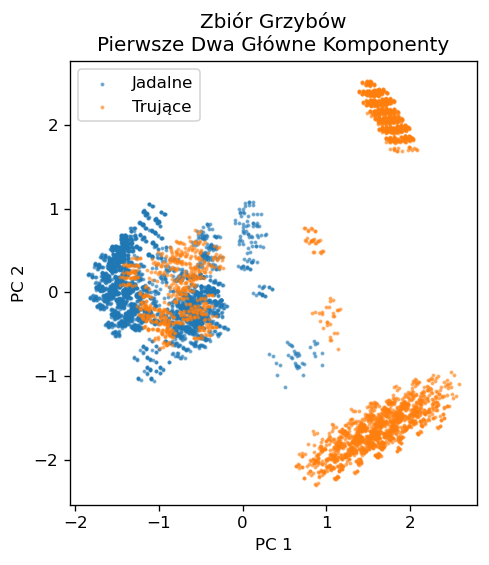

In [69]:
import matplotlib.pyplot as plt

plt.cla()
plt.clf()

plt.figure(dpi=120)
plt.scatter(X_train[y_train.values==0, 0], X_train[y_train.values==0, 1], label="Jadalne", alpha=0.5, s=2)
plt.scatter(X_train[y_train.values==1, 0], X_train[y_train.values==1, 1], label="Trujące", alpha=0.5, s=2)
plt.title("Zbiór Grzybów\nPierwsze Dwa Główne Komponenty")
plt.legend(frameon=True)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.gca().set_aspect('equal')

## Drzewo decyzyjne

In [72]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train, y_train)
print("\nDokładność testu: ", round(model.score(X_test, y_test), 5))


Dokładność testu:  0.93255


## Naiwyny Bayes